In [ ]:
#plot for iext 90

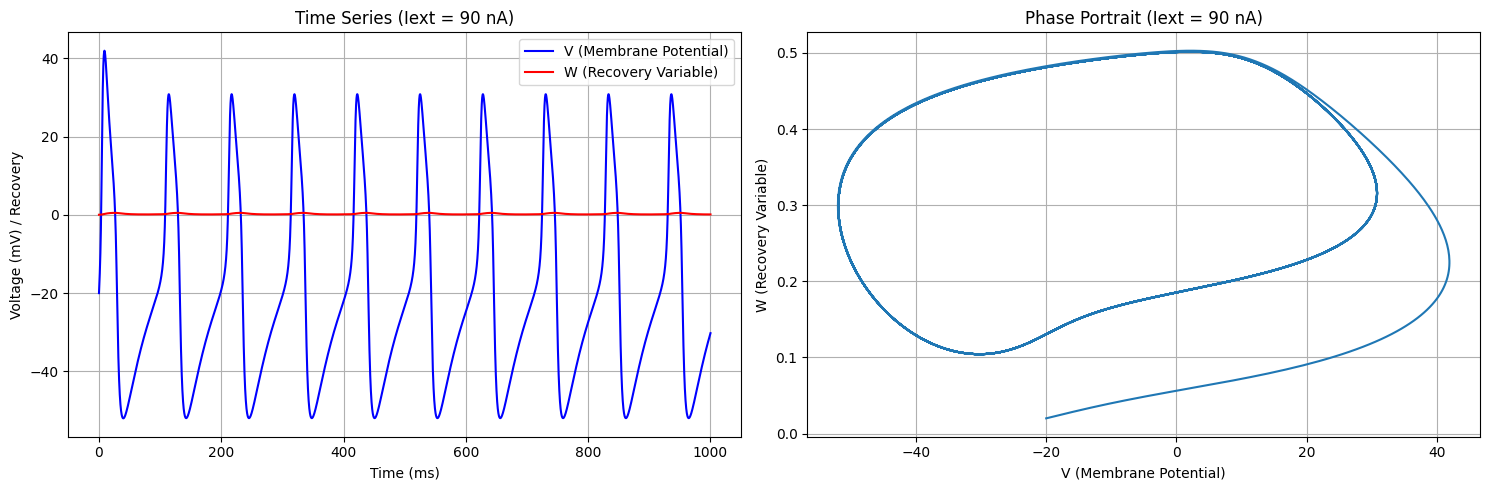

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Morris-Lecar model parameters
V1, V2, V3, V4 = -1.2, 18, 2, 30
gCa, gK, gL = 4.4, 8, 2
VCa, VK, VL = 120, -84, -60
C, phi = 20, 0.04

# Morris-Lecar model equations
def morris_lecar(X, t, Iext):
    V, W = X
    dVdt = (Iext - gCa * 0.5 * (1 + np.tanh((V - V1) / V2)) * (V - VCa)
            - gK * W * (V - VK) - gL * (V - VL)) / C
    dWdt = phi * (0.5 * (1 + np.tanh((V - V3) / V4)) - W) / (1 / np.cosh((V - V3) / (2 * V4)))
    return [dVdt, dWdt]

# Time array
t = np.linspace(0, 1000, 10000)

# Function to plot time series and phase portrait
def plot_morris_lecar(Iext):
    # Solve ODE
    X0 = [-20, 0.02]  # Initial conditions
    sol = odeint(morris_lecar, X0, t, args=(Iext,))
    V, W = sol.T

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot time series
    ax1.plot(t, V, 'b', label='V (Membrane Potential)')
    ax1.plot(t, W, 'r', label='W (Recovery Variable)')
    ax1.set_xlabel('Time (ms)')
    ax1.set_ylabel('Voltage (mV) / Recovery')
    ax1.set_title(f'Time Series (Iext = {Iext} nA)')
    ax1.legend()
    ax1.grid(True)

    # Plot phase portrait
    ax2.plot(V, W)
    ax2.set_xlabel('V (Membrane Potential)')
    ax2.set_ylabel('W (Recovery Variable)')
    ax2.set_title(f'Phase Portrait (Iext = {Iext} nA)')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()
# Plot for Iext = 90 nA
plot_morris_lecar(90)